In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#The idea of this implementation is to take some of the Image Adjustmnet Options in Adobe Photoshop
#and apply them in Python like Brightness/Contrast, Output levels and Hue Saturation
#The values of those filters are taken from the following line with some peraonal enhancements by try and error
#https://mashable.com/2013/10/20/photoshop-instagram-filters/#ep.GvgcusPqs

In [3]:
img=cv2.imread('croatiaimg.jpg',1)

In [4]:
#Contrast is defined as the separation between the darkest and brightest areas of the image.
#Increase contrast and you increase the separation between dark and bright,
# making shadows darker and highlights brighter. 
#Decrease contrast and you bring the shadows up and the highlights down to make them closer to one another.

def brightness_contrast(img, contrast=0, brightness=0):
	brightnesslvl = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)
	return brightnesslvl

def output_levels(img, channel, level=1, threshold=255):
	if channel == 'B':
		blue_channel = img[:, :, 0]
		blue_channel = blue_channel * level
		blue_channel = np.clip(blue_channel, 0, threshold)
		img[:, :, 0] = blue_channel
        
	elif channel == 'G':
		green_channel = img[:, :, 1]
		green_channel = green_channel * level
		green_channel = np.clip(green_channel, 0,  threshold)
		img[:, :, 1] = green_channel
        
	elif channel == 'R':
		red_channel = img[:, :, 2]
		red_channel = red_channel * level
		red_channel = np.clip(red_channel, 0, threshold)
		img[:, :, 2] = red_channel
	img = img.astype(np.uint8) #changing float to integer     
	return img

def hue_saturation(img_rgb, contrast = 1, brightness = 1):
	img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
	hue = img_hsv[:,:,0]
	saturation = img_hsv[:,:,1]
	hue = np.clip(hue * contrast, 0,  179)
	saturation = np.clip(saturation * brightness, 0, 255)
	img_hsv[:,:,0] = hue
	img_hsv[:,:,1] = saturation
	img_transformed = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
	return img_transformed


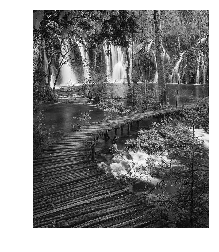

In [5]:
#INKWELL FILTER

def inkwell(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
plt.axis("off")
plt.imshow(cv2.cvtColor(inkwell(img), cv2.COLOR_BGR2RGB))
plt.show()



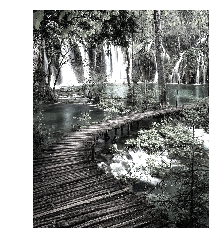

In [6]:
#GOTHAM FILTER


def gotham(img, hue=1, saturation=0.1, contrast=1.3, brightness=-20):
    img = hue_saturation(img, hue, saturation)
    img = brightness_contrast(img, contrast, brightness)
    return img
plt.axis("off")
plt.imshow(cv2.cvtColor(gotham(img), cv2.COLOR_BGR2RGB))
plt.show()

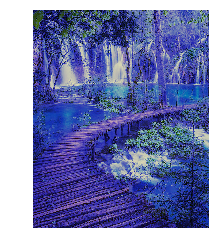

In [7]:
#AMARO FILTER
def amaro(img, contrast=0.85, brightness=0.957,b_channel=4.58):
    img = output_levels(img, "B", b_channel, 210)
    img = brightness_contrast(img, contrast, brightness)
    return img
#photoshop 26 29 139
plt.axis("off")
plt.imshow(cv2.cvtColor(amaro(img), cv2.COLOR_BGR2RGB))
plt.show()

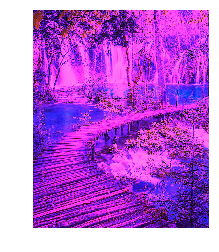

In [8]:
#1997 FILTER
def _1997(img, contrast=0.89, brightness=0.29, r_channel=2.67 ,g_channel=0.56,b_channel=1.32):
    img = brightness_contrast(img, contrast, brightness)
    img = output_levels(img, "R", r_channel, 255)
    img = output_levels(img, "G", g_channel, 255)
    img = output_levels(img, "B", b_channel, 255)
    return img
plt.axis("off")
plt.imshow(cv2.cvtColor(_1997(img), cv2.COLOR_BGR2RGB))
plt.show()

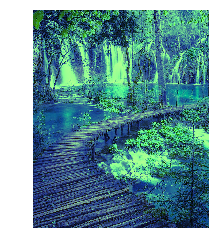

In [9]:
#LILI
def lily (img,contrast=0.7 ,brightness=0.2, g_channel=1.85, b_channel=1):
    img = brightness_contrast(img, contrast, brightness)
    img = output_levels(img, "G", g_channel, 255)
    img = output_levels(img, "B", b_channel, 195)
    return img
#Photoshop 21 60 56
plt.axis("off")
plt.imshow(cv2.cvtColor(lily(img), cv2.COLOR_BGR2RGB))
plt.show()

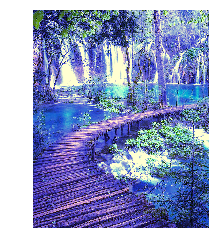

In [10]:
#lomo
def lomo(img, r_channel=1.33, g_channel=1.33):
		img = output_levels(img, "R", r_channel)
		img = output_levels(img, "G", g_channel)
		return img
plt.axis("off")
plt.imshow(cv2.cvtColor(lomo(img), cv2.COLOR_BGR2RGB))
plt.show()

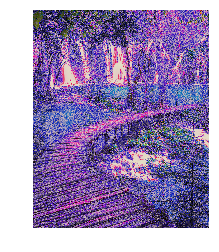

In [11]:
#EXCITMENT
def excitment(img, hue=1, saturation=12, contrast=0.89, brightness=0.297, r_channel=1.12, b_channel=1):
    img=hue_saturation(img,hue,saturation)
    img = output_levels(img, "R", r_channel, 255)
    img = output_levels(img, "B", b_channel, 221)
    img = brightness_contrast(img, contrast, brightness)
    
    return img
#Phtoshop 1 34 27 9 34 1
plt.axis("off")
plt.imshow(cv2.cvtColor(excitment(img), cv2.COLOR_BGR2RGB))
plt.show()